In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
site_1 = pd.read_pickle("utilization_data_site1.pkl")
site_2 = pd.read_pickle("utilization_data_site2.pkl")

In [46]:
site_1.head(40)



,hour,weekday,month,holiday,utilization,temperature,precipitation
0,13,0,10,True,0.076923,13.0,0.0
1,14,0,10,True,0.365385,14.0,0.0
2,15,0,10,True,0.365385,17.0,0.0
3,16,0,10,True,0.365385,18.0,0.0
4,17,0,10,True,0.365385,20.0,0.0
5,18,0,10,True,0.423077,22.0,0.0
6,19,0,10,True,0.461538,23.0,0.0
7,20,0,10,True,0.500000,23.0,0.0
8,21,0,10,True,0.500000,23.0,0.0
9,22,0,10,True,0.576923,23.0,0.0


In [47]:
site_1_X = site_1.drop(columns = "utilization")
site_1_y = site_1['utilization']
site_2_X = site_2.drop(columns = 'utilization')
site_2_y = site_2['utilization']

In [48]:
# Split data into train, test, validation 60/20/20
site_1_X_train, site_1_X_test, site_1_y_train, site_1_y_test = train_test_split(site_1_X, site_1_y, test_size= 0.3, random_state=42)
site_2_X_train, site_2_X_test, site_2_y_train, site_2_y_test = train_test_split(site_2_X, site_2_y, test_size= 0.3, random_state=42)

In [49]:
# Scale data using MinMaxScaler from sklearn
site_1_scaler = MinMaxScaler()
site_2_scaler = MinMaxScaler()

site_1_scaler.fit(site_1_X_train)
site_2_scaler.fit(site_2_X_train)

site_1_X_train = site_1_scaler.fit_transform(site_1_X_train)
site_1_X_test  = site_1_scaler.transform(site_1_X_test)

site_2_X_train = site_2_scaler.fit_transform(site_2_X_train)
site_2_X_test  = site_2_scaler.transform(site_2_X_test)

In [50]:
site_1['hour'] = (site_1['hour'] - 8) % 24
site_1['hour'] = site_1['hour'].astype(int)
site_2['hour'] = (site_2['hour'] - 8) % 24
site_2['hour'] = site_2['hour'].astype(int)

In [51]:
xp = site_1["hour"]
yp = site_1["utilization"]

Text(0, 0.5, 'Utilization')

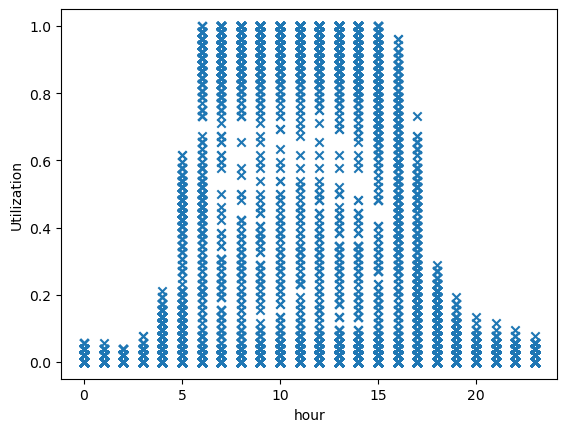

In [52]:
plt.scatter(xp, yp, marker='x')
plt.xlabel("hour")
plt.ylabel("Utilization")

[ 1212.50900828   -88.70603806   -15.07607029 -9826.89544719]


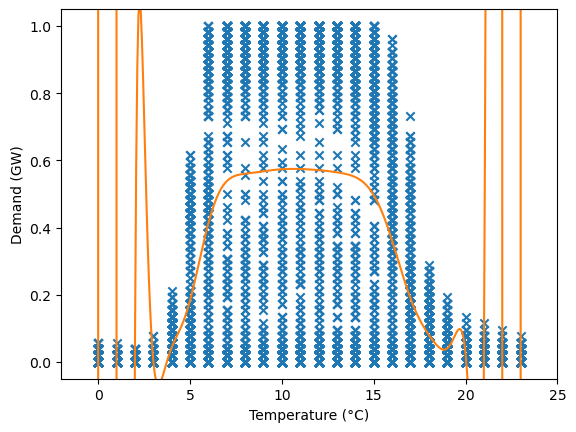

In [68]:
# x is the input variable
# y is the output vaiable
# d is degree pf polynomial regression

def plot_regression_poly(x, y, d):
    
    #Scaling data using min-max method
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1
    
    #Creating Polynomial features
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    #Solving normal equation and finding coefficients
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    xt = 2* (xt0 - min_x)/(max_x - min_x) -1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
        
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:4])
    #plt.savefig('all data_reg_'+str(d)+'.png', dpi = 300)

plot_regression_poly(x = xp, y=yp, d = 100)


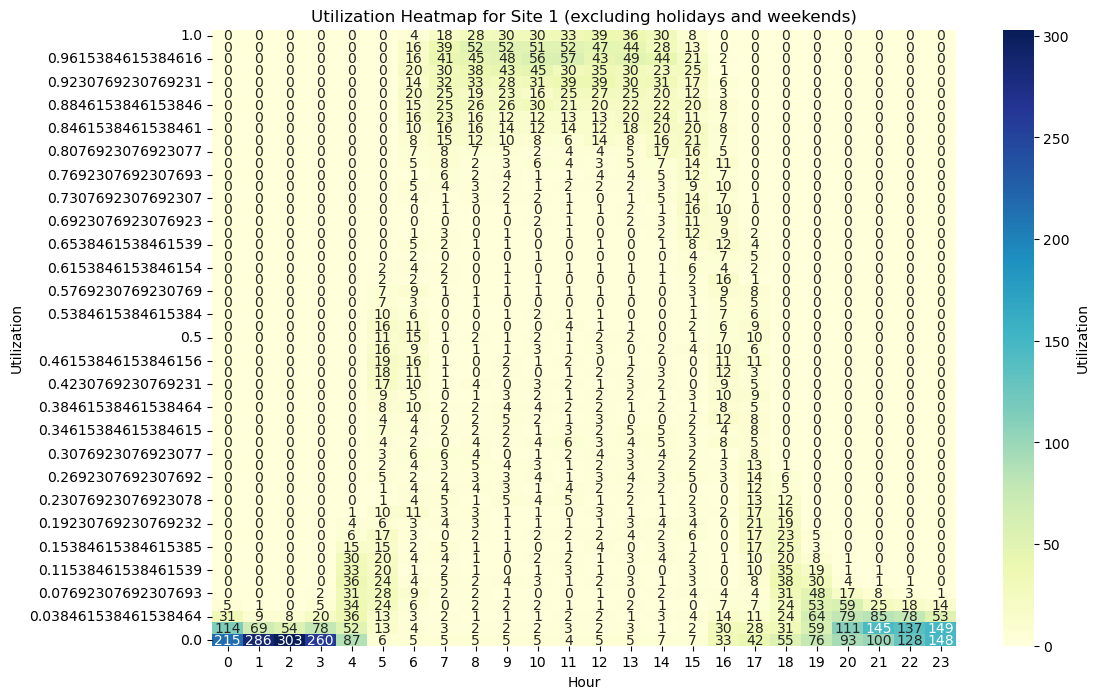

In [53]:
# Hier gehe ich davon aus, dass Ihre Spalte mit den Stunden "hour" heißt
# und die Spalte mit der Nutzung "utilization" heißt.
# Bitte passen Sie die Spaltennamen entsprechend an.

# Filtern Sie die Daten, um Feiertage und Wochenenden zu entfernen
filtered_data = site_1[(site_1['holiday'] == False) & (site_1['weekday'] < 5)]

# Erstellen Sie eine Pivot-Tabelle für die Heatmap
heatmap_data = filtered_data.pivot_table(index='utilization', columns='hour', aggfunc='size', fill_value=0)

# Erstellen Sie die Heatmap mit umgekehrter Y-Achse
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data[::-1], cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Utilization'})

# Einstellungen für die Achsenbeschriftungen und den Plot-Titel
plt.xlabel('Hour')
plt.ylabel('Utilization')
plt.title('Utilization Heatmap for Site 1 (excluding holidays and weekends)')

# Zeigen Sie die Heatmap an
plt.show()

In [54]:
print(site_1.corr())

                   hour   weekday     month   holiday  utilization  \
hour           1.000000  0.000275 -0.000168 -0.000844    -0.040150   
weekday        0.000275  1.000000 -0.000691 -0.125544    -0.346962   
month         -0.000168 -0.000691  1.000000  0.000380    -0.028546   
holiday       -0.000844 -0.125544  0.000380  1.000000    -0.102660   
utilization   -0.040150 -0.346962 -0.028546 -0.102660     1.000000   
temperature    0.227133 -0.002021  0.233564 -0.071864     0.290655   
precipitation -0.014741 -0.007683 -0.021305 -0.000130     0.005524   

               temperature  precipitation  
hour              0.227133      -0.014741  
weekday          -0.002021      -0.007683  
month             0.233564      -0.021305  
holiday          -0.071864      -0.000130  
utilization       0.290655       0.005524  
temperature       1.000000      -0.097912  
precipitation    -0.097912       1.000000  


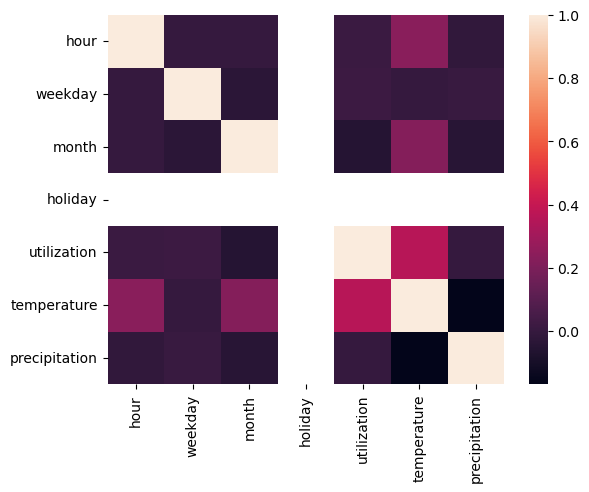

In [73]:
sns.heatmap(filtered_data.corr(method = "spearman"));

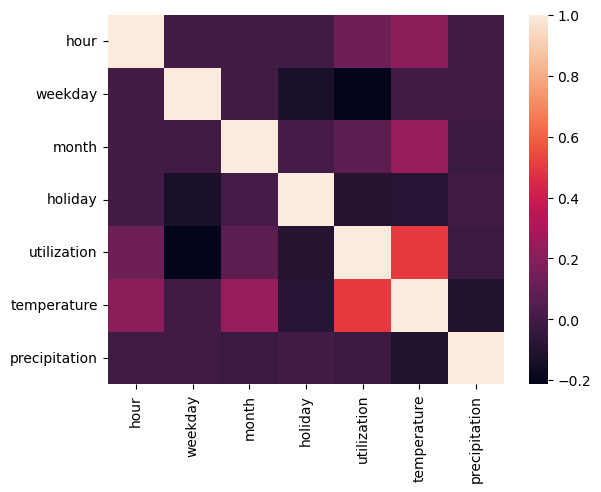

In [56]:
sns.heatmap(site_2.corr());